In [29]:
import pandas as pd
import numpy as np

In [58]:
# Make a prediction with weight
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else -1.0
 
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
    return weights
 
# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
    predictions = list()
    weights = train_weights(train, l_rate, n_epoch)
    for row in test:
        prediction = predict(row, weights)
        predictions.append(prediction)
    return(predictions)
 
seed(1)
# load and prepare data
filename = 'C:/Users/kxj133/Downloads/task_9_5/Perceptron.xlsx'

data = pd.read_excel(filename)

data.columns = ['col1','col2','label']

X_test = pd.DataFrame(columns = ['col1','col2'])
X_test['col1'] = np.random.randint(low =1,high = 100,size =10000)
X_test['col2'] = np.random.randint(low =1,high = 100,size =10000)

X_test = X_test.values

### Building Perceptron

n_folds = 3
l_rate = 0.01
n_epoch = 2000
Prediction = perceptron(data.values,X_test, l_rate, n_epoch)

In [68]:
def activation_value(row, weights):
    activation_list = []
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return activation

In [62]:
weight_list = train_weights(data.values,l_rate,n_epoch)

In [74]:
activation_list = []
for i in range(len(data.values)):
    activation_list.append(activation_value(data.values[i],weight_list))

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

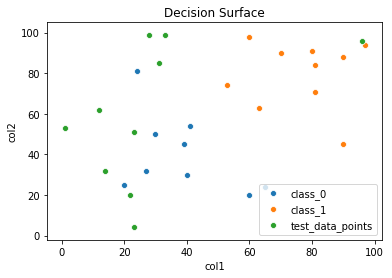

In [78]:
# this is to plot the kde
sns.scatterplot(x = data[data['label'] == -1]['col1'],
                y = data[data['label'] == -1]['col2'],
                label='class_0')

sns.scatterplot(x = data[data['label'] == 1]['col1'],
                y = data[data['label'] == 1]['col2'],
                label='class_1')

sns.scatterplot(x = X_test[0:10,0],
                y = X_test[0:10,1],
                label='test_data_points')

plt.title("Decision Surface")

# beautifying the labels
plt.xlabel('col1')
plt.ylabel('col2')
plt.show()